<a href="https://colab.research.google.com/github/MedhaWagh/Colab/blob/master/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVM

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('data.csv')


In [0]:
y = dataset.iloc[:, -1].values
print(y)

[0 0 0 ... 0 0 0]


In [0]:
for col in dataset.columns: print(col, ':', len(dataset[col].unique()), 'labels')

recency : 12 labels
history : 34833 labels
used_discount : 2 labels
used_bogo : 2 labels
zip_code : 3 labels
is_referral : 2 labels
channel : 3 labels
offer : 3 labels
conversion : 2 labels


##Encoding Categorical Variables

In [0]:
import copy

dataset1 = dataset.copy()
X = dataset1.drop(["conversion"], inplace = True, axis = 1,
                  )
X = pd.get_dummies(dataset1, columns=['zip_code', 'channel', 'offer'], prefix = ['ZC', 'Cnl', 'Ofr'])

pd.DataFrame.from_records(X)

,recency,history,used_discount,used_bogo,is_referral,ZC_Rural,ZC_Surburban,ZC_Urban,Cnl_Multichannel,Cnl_Phone,Cnl_Web,Ofr_Buy One Get One,Ofr_Discount,Ofr_No Offer
0,10,142.44,1,0,0,0,1,0,0,1,0,1,0,0
1,6,329.08,1,1,1,1,0,0,0,0,1,0,0,1
2,7,180.65,0,1,1,0,1,0,0,0,1,1,0,0
3,9,675.83,1,0,1,1,0,0,0,0,1,0,1,0
4,2,45.34,1,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,0,0,0,1,0,0,1,0,1,0
63996,5,38.91,0,1,1,0,0,1,0,1,0,0,1,0
63997,6,29.99,1,0,1,0,0,1,0,1,0,0,1,0
63998,1,552.94,1,0,1,0,1,0,1,0,0,1,0,0


In [0]:
X= X.iloc[:,:].values
y = dataset.iloc[:, -1].values
pd.DataFrame.from_records(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,10.0,142.44,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,6.0,329.08,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7.0,180.65,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,9.0,675.83,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.0,45.34,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10.0,105.54,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
63996,5.0,38.91,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
63997,6.0,29.99,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
63998,1.0,552.94,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


##Taking care of Missing Value if any

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:2])
X[:, 0:2] = imputer.transform(X[:, 0:2])

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
pd.DataFrame.from_records(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.635527,-0.694042,0.905982,-1.106193,0.999958,-0.419500,1.105588,-0.817135,-0.371929,1.131736,-0.886480,1.415474,-0.706941,-0.707902
1,-0.788331,0.595313,0.905982,-1.106193,0.999958,-0.419500,1.105588,-0.817135,-0.371929,-0.883598,1.128057,-0.706477,1.414545,-0.707902
2,-0.503559,4.142097,0.905982,0.904001,0.999958,2.383788,-0.904496,-0.817135,-0.371929,1.131736,-0.886480,-0.706477,1.414545,-0.707902
3,1.205071,-0.323173,-1.103775,0.904001,0.999958,-0.419500,1.105588,-0.817135,-0.371929,-0.883598,1.128057,-0.706477,-0.706941,1.412624
4,-1.357875,0.131484,0.905982,-1.106193,-1.000042,-0.419500,-0.904496,1.223789,-0.371929,1.131736,-0.886480,-0.706477,-0.706941,1.412624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,0.920299,-0.807988,0.905982,-1.106193,-1.000042,-0.419500,-0.904496,1.223789,-0.371929,1.131736,-0.886480,-0.706477,-0.706941,1.412624
47996,-0.218788,0.087608,0.905982,0.904001,-1.000042,-0.419500,-0.904496,1.223789,2.688688,-0.883598,-0.886480,1.415474,-0.706941,-0.707902
47997,1.774614,0.688934,-1.103775,0.904001,0.999958,-0.419500,-0.904496,1.223789,2.688688,-0.883598,-0.886480,1.415474,-0.706941,-0.707902
47998,-1.357875,0.347406,-1.103775,0.904001,-1.000042,-0.419500,-0.904496,1.223789,2.688688,-0.883598,-0.886480,-0.706477,1.414545,-0.707902


## Training the Kernel SVM model on the Training set

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Making the Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13678     0]
 [ 2322     0]]


0.854875

##Important Feature

[0.11121764 0.83642933 0.00970649 0.00839534 0.00909568 0.00315225
 0.00200621 0.00194718 0.00165702 0.00262013 0.00218751 0.00228247
 0.00419829 0.00510446]


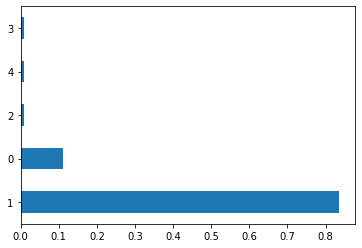

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest().plot(kind='barh')
plt.show()